In [20]:
!open .

In [8]:
import mido
from mido import MidiFile

In [9]:
file = MidiFile('data/Midi #8.mid')

In [10]:
message = mido.Message('program_change', program=10)

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
notes = []
for message in file:
    print(message)
    try:
        notes.append(message.note)
    except AttributeError:
        pass
    
    #plt.plot()
    

<meta message set_tempo tempo=468750 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message track_name name='Nexus Lead 1' time=0>
note_on channel=0 note=43 velocity=100 time=0
note_on channel=0 note=31 velocity=100 time=0
note_on channel=0 note=67 velocity=100 time=0
note_off channel=0 note=67 velocity=64 time=0.05859375
note_on channel=0 note=67 velocity=100 time=0.64453125
note_off channel=0 note=67 velocity=64 time=0.234375
note_on channel=0 note=69 velocity=100 time=0.3515625
note_off channel=0 note=69 velocity=64 time=0.1171875
note_on channel=0 note=70 velocity=100 time=0.234375
note_off channel=0 note=70 velocity=64 time=0.1171875
note_off channel=0 note=43 velocity=64 time=0.1171875
note_off channel=0 note=31 velocity=64 time=0
note_on channel=0 note=46 velocity=100 time=0.234375
note_on channel=0 note=34 velocity=100 time=0
note_on channel=0 note=67 velocity=100 time=0
note_off channel=0 note=67 v

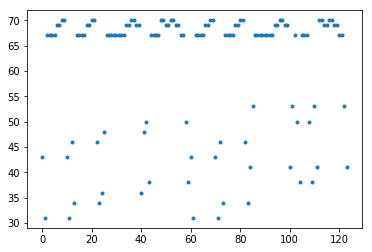

In [13]:
plt.plot(notes,'.')

In [14]:
import keras

Using TensorFlow backend.


In [15]:
lstm = keras.layers.LSTM(1)

In [16]:
model = keras.Sequential()

In [17]:
network_input = np.array(notes)

In [18]:
from keras.layers import LSTM, Dense, Dropout

In [19]:
model.add(keras.layers.LSTM(13,
        input_shape=(13,1)
    ))
model.add(Dropout(0.3))
model.add(LSTM(512, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(512))
model.add(Dense(256))
model.add(Dropout(0.3))
model.add(Dense(n_vocab))


ValueError: Input 0 is incompatible with layer lstm_3: expected ndim=3, found ndim=2

In [20]:
model.add(keras.layers.Activation('softmax'))

In [21]:
model.compile(loss='hinge', optimizer=keras.optimizers.SGD(lr=0.1))

In [22]:
sequence_length = 13
# get all pitch names
pitchnames = sorted(set(item for item in notes))
# create a dictionary to map pitches to integers
note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
network_input = []
network_output = []
# create input sequences and the corresponding outputs
for i in range(0, len(notes) - sequence_length, 1):
    sequence_in = notes[i:i + sequence_length]
    sequence_out = notes[i + sequence_length]

    network_input.append([note_to_int[char] for char in sequence_in])
    network_output.append(note_to_int[sequence_out])
n_patterns = len(network_input)
# reshape the input into a format compatible with LSTM layers
network_input = numpy.reshape(network_input, (n_patterns, sequence_length, 1))
# normalize input
# network_input = network_input / float(n_vocab)
network_output = keras.utils.to_categorical(network_output)

In [23]:
model.fit(network_input, network_output, epochs=200)

Epoch 1/200
111/111 [==============================] - 1s 5ms/step - loss: 0.9948
Epoch 2/200
111/111 [==============================] - 0s 633us/step - loss: 0.9948
Epoch 3/200
111/111 [==============================] - 0s 610us/step - loss: 0.9947
Epoch 4/200
111/111 [==============================] - 0s 659us/step - loss: 0.9947
Epoch 5/200
111/111 [==============================] - 0s 614us/step - loss: 0.9948
Epoch 6/200
111/111 [==============================] - 0s 586us/step - loss: 0.9947
Epoch 7/200
111/111 [==============================] - 0s 660us/step - loss: 0.9948
Epoch 8/200
111/111 [==============================] - 0s 631us/step - loss: 0.9947
Epoch 9/200
111/111 [==============================] - 0s 642us/step - loss: 0.9946
Epoch 10/200
111/111 [==============================] - 0s 610us/step - loss: 0.9947
Epoch 11/200
111/111 [==============================] - 0s 608us/step - loss: 0.9947
Epoch 12/200
111/111 [==============================] - 0s 555us/step - loss

111/111 [==============================] - ETA: 0s - loss: 0.993 - 0s 980us/step - loss: 0.9930
Epoch 98/200
111/111 [==============================] - 0s 721us/step - loss: 0.9934
Epoch 99/200
111/111 [==============================] - 0s 541us/step - loss: 0.9936
Epoch 100/200
111/111 [==============================] - 0s 557us/step - loss: 0.9932
Epoch 101/200
111/111 [==============================] - 0s 632us/step - loss: 0.9931
Epoch 102/200
111/111 [==============================] - 0s 680us/step - loss: 0.9935
Epoch 103/200
111/111 [==============================] - 0s 588us/step - loss: 0.9928
Epoch 104/200
111/111 [==============================] - 0s 633us/step - loss: 0.9933
Epoch 105/200
111/111 [==============================] - 0s 1ms/step - loss: 0.9933
Epoch 106/200
111/111 [==============================] - 0s 852us/step - loss: 0.9934
Epoch 107/200
111/111 [==============================] - 0s 821us/step - loss: 0.9936
Epoch 108/200
111/111 [=========================

111/111 [==============================] - 0s 881us/step - loss: 0.9928
Epoch 193/200
111/111 [==============================] - 0s 938us/step - loss: 0.9930
Epoch 194/200
111/111 [==============================] - 0s 754us/step - loss: 0.9928
Epoch 195/200
111/111 [==============================] - 0s 768us/step - loss: 0.9929
Epoch 196/200
111/111 [==============================] - 0s 790us/step - loss: 0.9929
Epoch 197/200
111/111 [==============================] - 0s 684us/step - loss: 0.9928
Epoch 198/200
111/111 [==============================] - 0s 905us/step - loss: 0.9931
Epoch 199/200
111/111 [==============================] - 0s 745us/step - loss: 0.9930
Epoch 200/200
111/111 [==============================] - 0s 935us/step - loss: 0.9926


In [24]:
import music21

In [25]:
file.tracks[0]

<midi track '' 3 messages>

In [26]:
network_output[0]*pitchnames

array([ 0., 34.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [28]:
mido.tempo2bpm(468750)

128.0

In [58]:
messages[1]

<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>

In [56]:
messages = []
for message in file.tracks[0]:
    print(message)
    messages.append(message)
    if message.time==0.64453125:
        break

<meta message set_tempo tempo=468750 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message end_of_track time=0>


In [30]:
file.print_tracks()

=== Track 0
<meta message set_tempo tempo=468750 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message end_of_track time=0>
=== Track 1
<meta message track_name name='Nexus Lead 1' time=0>
<message note_on channel=0 note=43 velocity=100 time=0>
<message note_on channel=0 note=31 velocity=100 time=0>
<message note_on channel=0 note=67 velocity=100 time=0>
<message note_off channel=0 note=67 velocity=64 time=12>
<message note_on channel=0 note=67 velocity=100 time=132>
<message note_off channel=0 note=67 velocity=64 time=48>
<message note_on channel=0 note=69 velocity=100 time=72>
<message note_off channel=0 note=69 velocity=64 time=24>
<message note_on channel=0 note=70 velocity=100 time=48>
<message note_off channel=0 note=70 velocity=64 time=24>
<message note_off channel=0 note=43 velocity=64 time=24>
<message note_off channel=0 note=31 velocity=64 time=0>
<message note_on channel=0 note=46 velocity=100 t

In [25]:
score = music21.converter.parse(file)
key = score.analyze('key')

AttributeError: 'MidiFile' object has no attribute 'startswith'

In [29]:
pitchnames

[31, 34, 36, 38, 41, 43, 46, 48, 50, 53, 67, 69, 70]

In [56]:
def add_midi(network_output, pitchnames):
    new_midi = mido.MidiFile()
    new_track = mido.MidiTrack()
    new_midi.tracks.append(new_track)
    matrix = [network_out*pitchnames for network_out in network_output]
    note_array = [array[array>0][0] for array in matrix]
    note_status = ['note_on'] * len(note_array)
    velocities = np.ones(len(note_array))*64
    times = np.ones(len(note_array))*64
    new_track.append(mido.Message('program_change', program=12, time=0))
    for i in range(len(note_array)):
        new_track.append(mido.Message(note_status[i], note=int(note_array[i]), 
                             velocity=int(velocities[i]), time=int(times[i])))
    new_midi.save('new_song.mid')

In [57]:
add_midi(network_output, pitchnames)

In [59]:
!open .

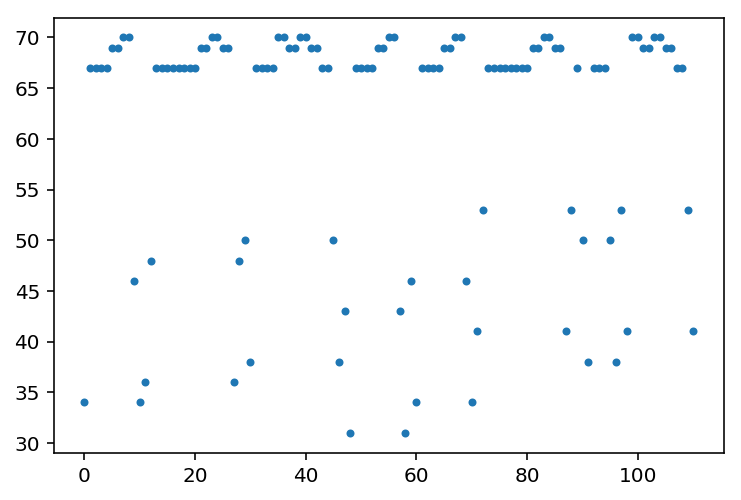

In [71]:
a = [network_out*pitchnames for network_out in network_output]
plt.plot([b[b>0][0] for b in a],'.')
mido.

In [68]:
a[a>0][0]

34.0

## 

In [20]:
import os
import mido
import numpy as np
from mido import MidiFile

def getAllFeatureVectors():
    rootdir = os.getcwd() + '/data/'
   
    featureVectors = []
    i = 0
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            midiFileName = os.path.join(subdir, file)
           #print os.path.join(subdir, file)
           if (not midiFileName.endswith('.mid')):
                continue
            featureVectors.append(getFeatureVector(midiFileName))
            i+=1
           
   # Convert to numpy arrays
    return np.array(featureVectors)
           
def getFeatureVector(midiFileName):
    file = MidiFile(midiFileName)

    features = []

    i = 0
    timeSinceStart = 0.0
    for message in file:
       
       (newFeatureVect, timeSinceStart) = processMessage(message, timeSinceStart)
        if (type(newFeatureVect) is list):
            features.append(newFeatureVect)
            i += 1
       
    return features
       
def processMessage(m, timeSinceStart):
    vector = []
   
    if (type(m.time) is float or type(m.time) is int):
        timeSinceStart += m.time
   
    if (m.type in ['note_on', 'note_off']):
       
        on = 1
        if (m.type == 'note_off'):
            on = 0
       
        vector = [on, m.channel, m.note, m.velocity, timeSinceStart]
        return (vector, timeSinceStart)
    else:
        return (None, timeSinceStart)
   
   
featureVectors = getAllFeatureVectors()